In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.0
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
applaunchservices                 0.3.0
appnope                           0.1.2
appscript                         1.1.2
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                   

In [3]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [4]:
 data = tf.keras.utils.image_dataset_from_directory('pics')

Found 297 files belonging to 3 classes.


In [5]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

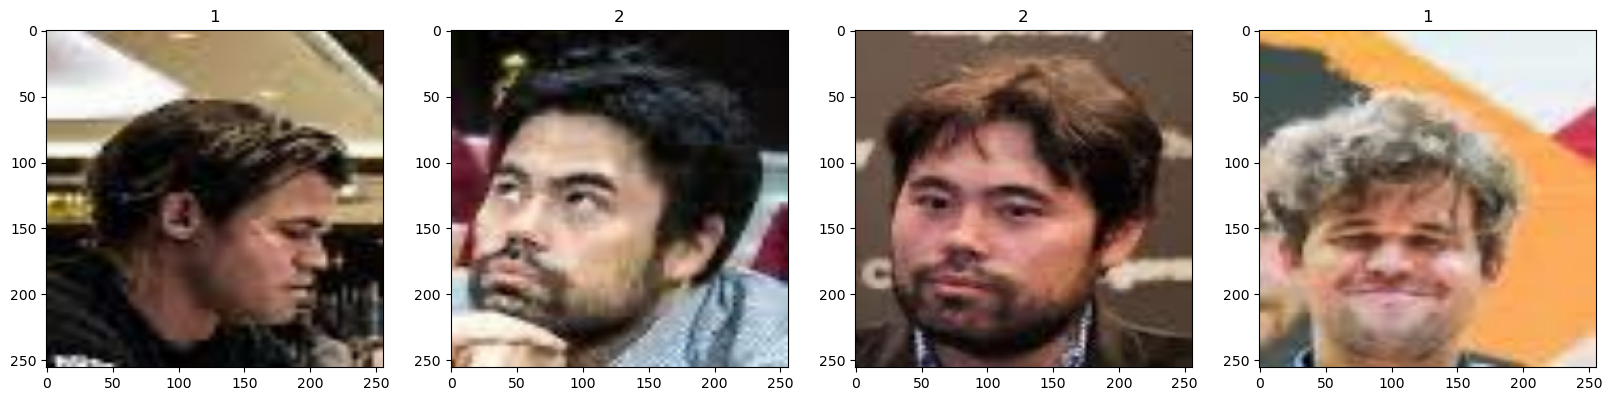

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [7]:
data = data.map(lambda x,y: (x/255,y))

In [8]:
data.as_numpy_iterator().next()

(array([[[[0.33333334, 0.2       , 0.16078432],
          [0.33333334, 0.2       , 0.16078432],
          [0.33333334, 0.2       , 0.16078432],
          ...,
          [0.04313726, 0.02745098, 0.01568628],
          [0.04313726, 0.02745098, 0.01568628],
          [0.04313726, 0.02745098, 0.01568628]],
 
         [[0.33333334, 0.2       , 0.16078432],
          [0.33333334, 0.2       , 0.16078432],
          [0.33333334, 0.2       , 0.16078432],
          ...,
          [0.04313726, 0.02745098, 0.01568628],
          [0.04313726, 0.02745098, 0.01568628],
          [0.04313726, 0.02745098, 0.01568628]],
 
         [[0.33333334, 0.20258884, 0.16207874],
          [0.33333334, 0.20258884, 0.16207874],
          [0.33295918, 0.20221467, 0.16170457],
          ...,
          [0.04313726, 0.02745098, 0.01568628],
          [0.04313726, 0.02745098, 0.01568628],
          [0.04313726, 0.02745098, 0.01568628]],
 
         ...,
 
         [[0.60917586, 0.67192096, 0.8013327 ],
          [0.60917

In [9]:
len(data)

10

In [10]:
train_len = int(len(data)*0.7)
val_len = int(len(data)*0.1)+1
test_len = int(len(data)*0.2)+1
print(train_len, val_len, test_len)

7 2 3


In [11]:
train = data.take(train_len)
val = data.skip(train_len).take(val_len)
test = data.skip(train_len+val_len).take(test_len)

In [122]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Input
from keras import regularizers


In [136]:
model = Sequential()

In [137]:
model.add(Input(shape=(256,256,3)))
model.add(tf.keras.layers.RandomFlip("horizontal"))
model.add(tf.keras.layers.RandomRotation(0.05))
#model.add(tf.keras.layers.RandomZoom(0.2))
#model.add(tf.keras.layers.RandomBrightness(0.2))
#model.add(tf.keras.layers.RandomContrast(0.2))
#model.add(tf.keras.layers.RandomTranslation(0.1, 0.1))
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), 1, activation='relu',))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [138]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [139]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_2 (RandomFlip)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,520,995 (24.88 MB)

 Trainable params: 6,520,995 (24.88 MB)

 Non-trainable params: 0 (0.00 B)

In [140]:
logdir = 'log'

In [141]:


tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=40, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 983ms/step - accuracy: 0.3169 - loss: 1.2341 - val_accuracy: 0.3438 - val_loss: 1.0947
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 842ms/step - accuracy: 0.3312 - loss: 1.0981 - val_accuracy: 0.4531 - val_loss: 1.0932
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 807ms/step - accuracy: 0.3666 - loss: 1.0889 - val_accuracy: 0.4844 - val_loss: 1.0880
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 951ms/step - accuracy: 0.4613 - loss: 1.0840 - val_accuracy: 0.4844 - val_loss: 1.0704
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 822ms/step - accuracy: 0.4543 - loss: 1.0473 - val_accuracy: 0.4688 - val_loss: 1.0432
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 958ms/step - accuracy: 0.4012 - loss: 1.0738 - val_accuracy: 0.5625 - val_loss: 0.9644
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 808ms/step - accuracy: 0.5725 - loss: 0.9092 - val_accuracy: 0.6562 - val_loss: 0.8246
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 791ms/step - accuracy: 0.5780 - loss: 0.9380 - val_accuracy: 0.6719 - val_loss

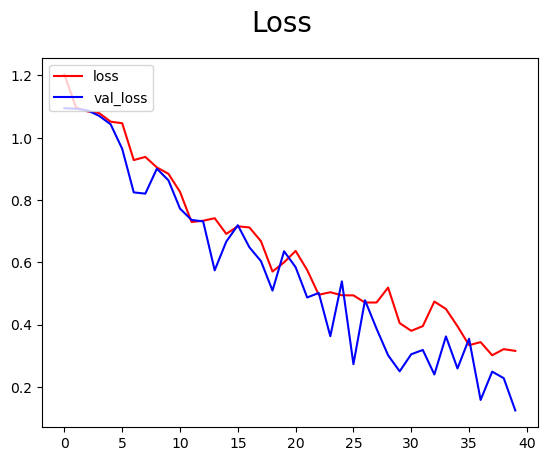

In [142]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='blue', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [143]:
from tensorflow.keras.metrics import SparseCategoricalAccuracy

In [144]:
accuracy = SparseCategoricalAccuracy()

In [145]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    accuracy.update_state(y,yhat)

print(accuracy.result().numpy())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
0.8888889


In [146]:
import cv2


In [147]:
def chessclassify(img_file): #enter the filename of the image you want to test(string)
    img = cv2.imread(img_file)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    resize = tf.image.resize(img, (256,256))
    yhat = model.predict(np.expand_dims(resize/255,0))
    pred = np.argmax(yhat)
    print(yhat)
    print(pred)
    if pred == 0: 
        print('This is a picture of Nodirbek Abdusattorov!')
    elif pred == 1:
        print('This is a picture of Magnus Carlsen!')
    else: 
        print('This is a picture of Hikaru Nakamura!')

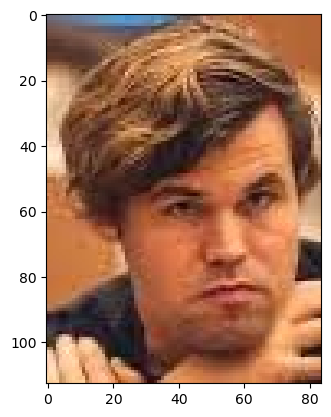

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
[[0.00660167 0.00953394 0.9838644 ]]
2
This is a picture of Hikaru Nakamura!


In [148]:
chessclassify('magnus_test18.jpg')